# TODOS

* Numeric data (temperature, snow, wind, distance):
    * Convert to same unit - convert to US units
    * Impute missing values
    * Standardize/normalize
* For categorical data:
    * Encode appropriately
    * Composites -> if no 4 then take average and treat as new category, 4 trumps all
* Age of circles - older circles are more numerous
* Any outliers for these

## Our Questions:

NYZZ is a test circle - exclude  from list of circles?

## Goal after cleaning

Predict how many people will show up.

### See data dictionary: http://www.audubon.org/sites/default/files/documents/cbc_report_field_definitions_2013.pdf

In [2]:
# !pip install units  # or install with conda - just run once if installing from jupyter notebook

  Stored in directory: /Users/jeffhale/Library/Caches/pip/wheels/fe/85/88/51b4cc421dd9dad17934779e59ad01462074f8b23d3c4ff545
Successfully built units


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from units import unit

In [10]:
raw_data = pd.read_csv("cbc_effort_weather_1900-2018.csv", encoding = "ISO-8859-1")

In [12]:
raw_data.head()

In [13]:
raw_data.tail()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,...,wind_unit,min_snow,max_snow,snow_unit,am_cloud,pm_cloud,am_rain,pm_rain,am_snow,pm_snow
106924,Sundance,US-WY,44.208072,-104.227101,2018,2017-12-30,4.0,12.0,3.0,3.0,...,1.0,1.0,4.0,2.0,6.0,6.0,3,3,3,3
106925,"Tortola, British V.I.",VG-,18.350191,-64.616712,2018,2017-12-30,2.0,NaN,NaN,2.0,...,3.0,NaN,NaN,NaN,5.0,6.0,3,3,3,3
106926,"East End, St. Croix, USVI",VI-,17.757222,-64.560191,2018,2017-12-17,17.0,NaN,NaN,7.0,...,1.0,NaN,NaN,NaN,6.0,2.0,3,1,"3,1",3
106927,"St. Croix, USVI",VI-,17.716794,-64.783308,2018,2017-12-17,19.0,NaN,NaN,10.0,...,1.0,NaN,NaN,NaN,6.0,2.0,3,1,NaN,NaN
106928,"St. John, USVI",VI-,18.350191,-64.700021,2018,2017-12-23,24.0,NaN,16.0,16.0,...,1.0,NaN,NaN,NaN,1.0,1.0,3,3,NaN,NaN


In [17]:
len(raw_data)

106929

Drop the test sites.

In [39]:
raw_data = raw_data.drop(raw_data[raw_data["circle_name"].str.contains("do not")].index)

In [40]:
raw_data.shape

(106925, 31)

In [20]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106929 entries, 0 to 106928
Data columns (total 31 columns):
circle_name           106929 non-null object
country_state         106929 non-null object
lat                   106929 non-null float64
lon                   106929 non-null float64
count_year            106929 non-null int64
count_date            106929 non-null object
n_field_counters      106710 non-null float64
n_feeder_counters     50578 non-null float64
min_field_parties     56213 non-null float64
max_field_parties     57096 non-null float64
field_hours           97027 non-null float64
feeder_hours          61914 non-null float64
nocturnal_hours       58529 non-null float64
field_distance        98805 non-null float64
nocturnal_distance    53196 non-null float64
distance_units        106600 non-null object
min_temp              82439 non-null float64
max_temp              82423 non-null float64
temp_unit             57029 non-null float64
min_wind              80030 non-

In [21]:
raw_data.describe(include = 'all')

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,...,wind_unit,min_snow,max_snow,snow_unit,am_cloud,pm_cloud,am_rain,pm_rain,am_snow,pm_snow
count,106929,106929,106929.000000,106929.000000,106929.000000,106929,106710.000000,50578.000000,56213.000000,57096.000000,...,57029.000000,76939.000000,77168.000000,53382.000000,82399.000000,82271.000000,81685,81585,81487,81413
unique,4822,199,NaN,NaN,NaN,1762,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,13,14,13,13
top,Springfield,US-CA,NaN,NaN,NaN,2017-12-16,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3,3
freq,258,5869,NaN,NaN,NaN,669,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,43253,44085,44381,44893
mean,NaN,NaN,39.988225,-91.623894,1987.639939,NaN,20.836356,4.674127,8.273424,9.941222,...,1.180890,2.032112,4.502163,2.207148,2.978070,3.243099,NaN,NaN,NaN,NaN
std,NaN,NaN,7.594114,19.897312,24.864985,NaN,21.376623,16.097177,7.592066,9.100400,...,0.638234,5.922338,11.357830,0.609421,2.016496,2.136038,NaN,NaN,NaN,NaN
min,NaN,NaN,-77.461409,-177.380631,1901.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,36.500018,-102.483303,1975.000000,NaN,8.000000,0.000000,4.000000,5.000000,...,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,40.816675,-88.024596,1993.000000,NaN,15.000000,1.000000,6.000000,8.000000,...,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,44.076819,-78.550000,2007.000000,NaN,27.000000,5.000000,10.000000,12.000000,...,1.000000,2.000000,5.000000,2.000000,5.000000,6.000000,NaN,NaN,NaN,NaN


In [22]:
raw_data.isnull().sum()

circle_name               0
country_state             0
lat                       0
lon                       0
count_year                0
count_date                0
n_field_counters        219
n_feeder_counters     56351
min_field_parties     50716
max_field_parties     49833
field_hours            9902
feeder_hours          45015
nocturnal_hours       48400
field_distance         8124
nocturnal_distance    53733
distance_units          329
min_temp              24490
max_temp              24506
temp_unit             49900
min_wind              26899
max_wind              26817
wind_unit             49900
min_snow              29990
max_snow              29761
snow_unit             53547
am_cloud              24530
pm_cloud              24658
am_rain               25244
pm_rain               25344
am_snow               25442
pm_snow               25516
dtype: int64

In [23]:
#What percentage are null
pd.DataFrame((raw_data.isnull().sum())/len(raw_data) * 100).sort_values(by = 0, ascending = False)

,0
n_feeder_counters,52.699455
nocturnal_distance,50.251101
snow_unit,50.077154
min_field_parties,47.429603
wind_unit,46.666480
temp_unit,46.666480
max_field_parties,46.603821
nocturnal_hours,45.263680
feeder_hours,42.098028
min_snow,28.046648


In [31]:
#What type are the different variables
raw_data.dtypes.sort_values()

count_year              int64
nocturnal_hours       float64
max_snow              float64
min_snow              float64
wind_unit             float64
max_wind              float64
min_wind              float64
temp_unit             float64
max_temp              float64
min_temp              float64
pm_cloud              float64
nocturnal_distance    float64
field_distance        float64
am_cloud              float64
feeder_hours          float64
field_hours           float64
max_field_parties     float64
min_field_parties     float64
n_feeder_counters     float64
n_field_counters      float64
lon                   float64
lat                   float64
snow_unit             float64
am_rain                object
pm_rain                object
circle_name            object
distance_units         object
count_date             object
country_state          object
am_snow                object
pm_snow                object
dtype: object

__N Field Counters__

In [32]:
raw_data['n_field_counters'].describe()

count    106710.000000
mean         20.836356
std          21.376623
min           0.000000
25%           8.000000
50%          15.000000
75%          27.000000
max         501.000000
Name: n_field_counters, dtype: float64

In [33]:
(raw_data['n_field_counters'].isnull().sum()) / len(raw_data) * 100

0.2048087983615296

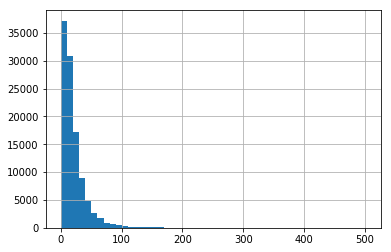

In [34]:
raw_data['n_field_counters'].hist(bins = 50);

In [35]:
raw_data.loc[raw_data['n_field_counters'] < 100].shape[0] / len(raw_data)

0.9857007921143937

__Count Year__

In [36]:
raw_data['count_year'].describe()

count    106929.000000
mean       1987.639939
std          24.864985
min        1901.000000
25%        1975.000000
50%        1993.000000
75%        2007.000000
max        2018.000000
Name: count_year, dtype: float64

In [47]:
(raw_data['count_year'].isnull().sum())/len(raw_data) * 100

0.0

In [41]:
raw_data.min()

circle_name           (Horton) Four Rivers
country_state                          AQ-
lat                               -77.4614
lon                               -177.381
count_year                            1901
count_date                      1900-12-25
n_field_counters                         0
n_feeder_counters                        0
min_field_parties                        0
max_field_parties                        0
field_hours                              0
feeder_hours                           -56
nocturnal_hours                          0
field_distance                           0
nocturnal_distance                       0
min_temp                              -340
max_temp                              -200
temp_unit                                1
min_wind                               -16
max_wind                                 0
wind_unit                                0
min_snow                                 0
max_snow                                 0
snow_unit  

In [42]:
raw_data.max()

circle_name           Îles-de-la-Madeleine
country_state                        us-wi
lat                                74.7167
lon                                179.285
count_year                            2018
count_date                      2018-01-05
n_field_counters                       501
n_feeder_counters                      968
min_field_parties                      150
max_field_parties                      322
field_hours                           4407
feeder_hours                          6105
nocturnal_hours                       1105
field_distance                       61087
nocturnal_distance                   33080
min_temp                             24996
max_temp                             28909
temp_unit                                2
min_wind                                99
max_wind                               500
wind_unit                                3
min_snow                               600
max_snow                               900
snow_unit  

# Make a new dataframe named df that we will use to start adding column.

In [56]:
df = raw_data

# Conversions
Will make two columns.

One for metric (SI) and one for imperial.

## Convert distances to US miles
key = distance_units

miles = 1
inches = 2
kilometers = 3
centimeters = 4

In [ ]:
distance_cols = ['field_distance', 'nocturnal_distance']

In [145]:
df.distance_units.value_counts()

Miles         99863
Kilometers     6734
Name: distance_units, dtype: int64

In [146]:
df['field_distance_imperial'] = np.where(df['distance_units']=='Miles', df['field_distance'], (df['field_distance'] / .6214))
df['field_distance_metric'] = np.where(df['distance_units']=='Kilometers', df['field_distance'], (df['field_distance'] * .6214))
df['nocturnal_distance_imperial'] = np.where(df['distance_units']=='Miles', df['nocturnal_distance'], (df['nocturnal_distance'] / .6214))
df['nocturnal_distance_metric'] = np.where(df['distance_units']=='Kilometers', df['nocturnal_distance'], (df['nocturnal_distance'] * .6214))

In [147]:
df.head()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,...,max_temp_metric,max_temp_imperial,min_snow_imperial,min_snow_metric,max_snow_metric,max_snow_imperial,field_distance_imperial,field_distance_metric,nocturnal_distance_imperial,nocturnal_distance_metric
0,Scotch Lake,CA-NB,45.950000,-66.983300,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Toronto,CA-ON,43.700000,-79.416700,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pacific Grove,US-CA,36.616700,-121.916700,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pueblo,US-CO,38.175251,-104.519575,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bristol,US-CT,41.671800,-72.949500,1901,1900-12-25,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
df.tail()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,...,max_temp_metric,max_temp_imperial,min_snow_imperial,min_snow_metric,max_snow_metric,max_snow_imperial,field_distance_imperial,field_distance_metric,nocturnal_distance_imperial,nocturnal_distance_metric
106924,Sundance,US-WY,44.208072,-104.227101,2018,2017-12-30,4.0,12.0,3.0,3.0,...,-3.888889,25.0,1.0,2.54,10.16,4.0,233.7,145.22118,NaN,NaN
106925,"Tortola, British V.I.",VG-,18.350191,-64.616712,2018,2017-12-30,2.0,NaN,NaN,2.0,...,28.888889,84.0,NaN,NaN,NaN,NaN,21.0,13.04940,NaN,NaN
106926,"East End, St. Croix, USVI",VI-,17.757222,-64.560191,2018,2017-12-17,17.0,NaN,NaN,7.0,...,29.444444,85.0,NaN,NaN,NaN,NaN,237.0,147.27180,NaN,NaN
106927,"St. Croix, USVI",VI-,17.716794,-64.783308,2018,2017-12-17,19.0,NaN,NaN,10.0,...,29.444444,85.0,NaN,NaN,NaN,NaN,225.6,140.18784,NaN,NaN
106928,"St. John, USVI",VI-,18.350191,-64.700021,2018,2017-12-23,24.0,NaN,16.0,16.0,...,29.444444,85.0,NaN,NaN,NaN,NaN,18.0,11.18520,NaN,NaN


In [151]:
df.nocturnal_distance_imperial.value_counts().head()

0.0     20025
1.0      2481
2.0      1717
10.0     1550
5.0      1465
Name: nocturnal_distance_imperial, dtype: int64

In [152]:
df.field_distance_imperial.value_counts().head()

80.0     307
40.0     287
120.0    282
90.0     281
60.0     280
Name: field_distance_imperial, dtype: int64

In [ ]:
df.field_distance_metric.value_counts().head()

In [153]:
df.nocturnal_distance_metric.value_counts().head()

0.0000    20025
0.6214     2488
1.2428     1718
6.2140     1550
3.1070     1467
Name: nocturnal_distance_metric, dtype: int64

## Convert snow
key = snow_unit

2 = inches

4 = centimeters

In [ ]:
snow_cols = ['min_snow', 'max_snow']

In [101]:
df.snow_unit.value_counts()

2.0    47850
4.0     5529
Name: snow_unit, dtype: int64

In [102]:
df['min_snow_imperial'] = np.where(df['snow_unit']==2, df['min_snow'], (df['min_snow'] / 2.54))
df.head()                                            

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,...,pm_cloud,am_rain,pm_rain,am_snow,pm_snow,min_temp_imperial,min_temp_metric,max_temp_metric,max_temp_imperial,min_snow_imperial
0,Scotch Lake,CA-NB,45.950000,-66.983300,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Toronto,CA-ON,43.700000,-79.416700,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pacific Grove,US-CA,36.616700,-121.916700,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pueblo,US-CO,38.175251,-104.519575,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bristol,US-CT,41.671800,-72.949500,1901,1900-12-25,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
df.tail()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,...,pm_cloud,am_rain,pm_rain,am_snow,pm_snow,min_temp_imperial,min_temp_metric,max_temp_metric,max_temp_imperial,min_snow_imperial
106924,Sundance,US-WY,44.208072,-104.227101,2018,2017-12-30,4.0,12.0,3.0,3.0,...,6.0,3,3,3,3,5.0,-15.000000,-3.888889,25.0,1.0
106925,"Tortola, British V.I.",VG-,18.350191,-64.616712,2018,2017-12-30,2.0,NaN,NaN,2.0,...,6.0,3,3,3,3,77.0,25.000000,28.888889,84.0,NaN
106926,"East End, St. Croix, USVI",VI-,17.757222,-64.560191,2018,2017-12-17,17.0,NaN,NaN,7.0,...,2.0,3,1,"3,1",3,78.0,25.555556,29.444444,85.0,NaN
106927,"St. Croix, USVI",VI-,17.716794,-64.783308,2018,2017-12-17,19.0,NaN,NaN,10.0,...,2.0,3,1,NaN,NaN,78.0,25.555556,29.444444,85.0,NaN
106928,"St. John, USVI",VI-,18.350191,-64.700021,2018,2017-12-23,24.0,NaN,16.0,16.0,...,1.0,3,3,NaN,NaN,73.0,22.777778,29.444444,85.0,NaN


In [104]:
df['min_snow_metric'] = np.where(df['snow_unit']==4, df['min_snow'], (df['min_snow'] * 2.54))   

In [106]:
df.tail()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,...,am_rain,pm_rain,am_snow,pm_snow,min_temp_imperial,min_temp_metric,max_temp_metric,max_temp_imperial,min_snow_imperial,min_snow_metric
106924,Sundance,US-WY,44.208072,-104.227101,2018,2017-12-30,4.0,12.0,3.0,3.0,...,3,3,3,3,5.0,-15.000000,-3.888889,25.0,1.0,2.54
106925,"Tortola, British V.I.",VG-,18.350191,-64.616712,2018,2017-12-30,2.0,NaN,NaN,2.0,...,3,3,3,3,77.0,25.000000,28.888889,84.0,NaN,NaN
106926,"East End, St. Croix, USVI",VI-,17.757222,-64.560191,2018,2017-12-17,17.0,NaN,NaN,7.0,...,3,1,"3,1",3,78.0,25.555556,29.444444,85.0,NaN,NaN
106927,"St. Croix, USVI",VI-,17.716794,-64.783308,2018,2017-12-17,19.0,NaN,NaN,10.0,...,3,1,NaN,NaN,78.0,25.555556,29.444444,85.0,NaN,NaN
106928,"St. John, USVI",VI-,18.350191,-64.700021,2018,2017-12-23,24.0,NaN,16.0,16.0,...,3,3,NaN,NaN,73.0,22.777778,29.444444,85.0,NaN,NaN


In [109]:
df['min_snow_metric'].value_counts().sort_values(ascending=False).head()

0.00     52481
2.54      3985
5.08      3556
10.16     2431
15.24     2338
Name: min_snow_metric, dtype: int64

In [111]:
df['min_snow_imperial'].value_counts().sort_values(ascending=False).head()

0.000000    52481
1.000000     2460
2.000000     2184
0.393701     1802
0.787402     1706
Name: min_snow_imperial, dtype: int64

In [114]:
df['max_snow_metric'] = np.where(df['snow_unit']==4, df['max_snow'], (df['max_snow'] * 2.54))   

In [115]:
df['max_snow_imperial'] = np.where(df['snow_unit']==2, df['max_snow'], (df['max_snow'] / 2.54))

In [119]:
df.loc[:, ['max_snow_imperial', 'max_snow_metric']].describe()

,max_snow_imperial,max_snow_metric
count,77165.000000,77165.000000
mean,3.066281,9.880511
std,8.405430,23.869954
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,3.543307,12.700000
max,900.000000,2286.000000


In [122]:
df.max_snow_imperial.value_counts().sort_values(ascending=False).head()

0.0    41984
2.0     2279
1.0     2102
6.0     2057
3.0     1888
Name: max_snow_imperial, dtype: int64

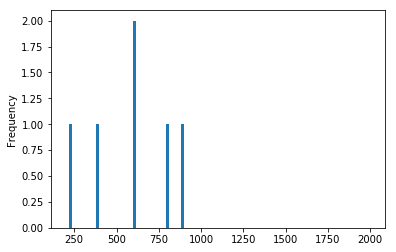

In [135]:
df.max_snow_imperial.plot(kind='hist', bins = 100, range=[200, 2000])

## Convert temperatures to Celsius
key = temp_unit

1 = celsius

2 = farenheit

In [54]:
temp_cols = ['min_temp', 'max_temp']

In [58]:
df.head()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,...,min_snow,max_snow,snow_unit,am_cloud,pm_cloud,am_rain,pm_rain,am_snow,pm_snow,min_temp_imperial
0,Scotch Lake,CA-NB,45.950000,-66.983300,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Toronto,CA-ON,43.700000,-79.416700,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pacific Grove,US-CA,36.616700,-121.916700,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pueblo,US-CO,38.175251,-104.519575,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bristol,US-CT,41.671800,-72.949500,1901,1900-12-25,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df['min_temp_imperial'] = np.where(df['temp_unit']==2, df['min_temp'], (df['min_temp']+32)*9/5)
df.head()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,...,max_snow,snow_unit,am_cloud,pm_cloud,am_rain,pm_rain,am_snow,pm_snow,min_temp_imperial,min_temp_metric
0,Scotch Lake,CA-NB,45.950000,-66.983300,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Toronto,CA-ON,43.700000,-79.416700,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pacific Grove,US-CA,36.616700,-121.916700,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pueblo,US-CO,38.175251,-104.519575,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bristol,US-CT,41.671800,-72.949500,1901,1900-12-25,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
df['max_temp_imperial'] = np.where(df['temp_unit']==2, df['max_temp'], (df['max_temp']+32)*9/5)

In [98]:
df.tail()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,...,am_cloud,pm_cloud,am_rain,pm_rain,am_snow,pm_snow,min_temp_imperial,min_temp_metric,max_temp_metric,max_temp_imperial
106924,Sundance,US-WY,44.208072,-104.227101,2018,2017-12-30,4.0,12.0,3.0,3.0,...,6.0,6.0,3,3,3,3,5.0,-15.000000,-3.888889,25.0
106925,"Tortola, British V.I.",VG-,18.350191,-64.616712,2018,2017-12-30,2.0,NaN,NaN,2.0,...,5.0,6.0,3,3,3,3,77.0,25.000000,28.888889,84.0
106926,"East End, St. Croix, USVI",VI-,17.757222,-64.560191,2018,2017-12-17,17.0,NaN,NaN,7.0,...,6.0,2.0,3,1,"3,1",3,78.0,25.555556,29.444444,85.0
106927,"St. Croix, USVI",VI-,17.716794,-64.783308,2018,2017-12-17,19.0,NaN,NaN,10.0,...,6.0,2.0,3,1,NaN,NaN,78.0,25.555556,29.444444,85.0
106928,"St. John, USVI",VI-,18.350191,-64.700021,2018,2017-12-23,24.0,NaN,16.0,16.0,...,1.0,1.0,3,3,NaN,NaN,73.0,22.777778,29.444444,85.0


In [79]:
df['min_temp_metric'] = np.where(df['temp_unit']==1, df['min_temp'], (df['min_temp']-32)*5/9)

In [96]:
df['max_temp_metric'] = np.where(df['temp_unit']==1, df['max_temp'], (df['max_temp']-32)*5/9)

In [81]:
df[df.loc[:, 'temp_unit']==2].head()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,...,max_snow,snow_unit,am_cloud,pm_cloud,am_rain,pm_rain,am_snow,pm_snow,min_temp_imperial,min_temp_metric
5778,Hope,US-AR,33.666700,-93.583300,1938,1937-12-24,2.0,0.0,1.0,1.0,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5964,Hope,US-AR,33.666700,-93.583300,1939,1938-12-28,1.0,0.0,1.0,1.0,...,0.0,2.0,3.0,1.0,3,3,3,3,55.0,12.777778
6171,Hope,US-AR,33.666700,-93.583300,1940,1939-12-26,1.0,0.0,1.0,1.0,...,0.0,2.0,2.0,2.0,2,3,3,3,40.0,4.444444
6439,Hope,US-AR,33.666700,-93.583300,1941,1940-12-28,1.0,0.0,1.0,1.0,...,0.0,2.0,6.0,1.0,3,3,3,3,52.0,11.111111
6724,Barrie,CA-ON,44.362021,-79.745518,1942,1941-12-26,2.0,0.0,1.0,1.0,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
df['max_wind'].value_counts().sort_values(ascending=False).head()

10.0    14290
5.0     12260
15.0    10741
0.0      6977
20.0     6264
Name: max_wind, dtype: int64

In [48]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106925 entries, 0 to 106928
Data columns (total 31 columns):
circle_name           106925 non-null object
country_state         106925 non-null object
lat                   106925 non-null float64
lon                   106925 non-null float64
count_year            106925 non-null int64
count_date            106925 non-null object
n_field_counters      106707 non-null float64
n_feeder_counters     50575 non-null float64
min_field_parties     56210 non-null float64
max_field_parties     57093 non-null float64
field_hours           97024 non-null float64
feeder_hours          61910 non-null float64
nocturnal_hours       58526 non-null float64
field_distance        98802 non-null float64
nocturnal_distance    53193 non-null float64
distance_units        106597 non-null object
min_temp              82436 non-null float64
max_temp              82420 non-null float64
temp_unit             57026 non-null float64
min_wind              80027 non-

# Examine numeric values

field_distance             float64
snow_unit                  float64
max_snow                   float64
min_snow                   float64
wind_unit                  float64
max_wind                   float64
min_wind                   float64
temp_unit                  float64
max_temp                   float64
min_temp                   float64
nocturnal_distance         float64
pm_cloud                   float64
nocturl_hours              float64
feeder_hours               float64
field_hours                float64
max_field_count_parties    float64
min_field_count_parties    float64
n_feeder_counters          float64
n_field_counters           float64
lon                        float64
lat                        float64
am_cloud                   float64

### Snow

In [26]:
#Variables of interest: snow_unit, max_snow, min_snow
raw_data['snow_unit'].value_counts()

2.0    43962
4.0      134
Name: snow_unit, dtype: int64

In [13]:
raw_data.loc[raw_data["snow_unit"] == 2.0, "max_snow"].head()

22    0.0
23    3.0
24    0.0
25    2.0
26    6.0
Name: max_snow, dtype: float64

In [12]:
raw_data.loc[raw_data["snow_unit"] == 4.0, "max_snow"].head()

639       0.0
1071    100.0
1072     50.0
1073     60.0
1076     60.0
Name: max_snow, dtype: float64

In [27]:
#Clearly 4.0 means something different? For now set to Nan
raw_data.loc[raw_data["snow_unit"] == 4.0, ["min_snow", "max_snow"]] = np.NaN

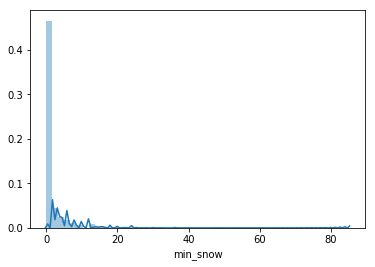

In [30]:
#Examine distribution - is mean or median better for this
sns.distplot(raw_data.loc[raw_data["min_snow"].isnull() == False]["min_snow"]);

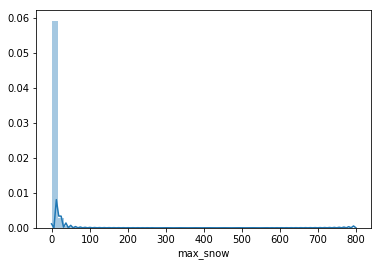

In [29]:
sns.distplot(raw_data.loc[raw_data["max_snow"].isnull() == False]["max_snow"]);

In [31]:
#Contains outliers so we will replace with 0 assuming no snow happened if it wasn't recorded
raw_data["min_snow"] = raw_data["min_snow"].fillna(0)
raw_data["max_snow"] = raw_data["max_snow"].fillna(0)

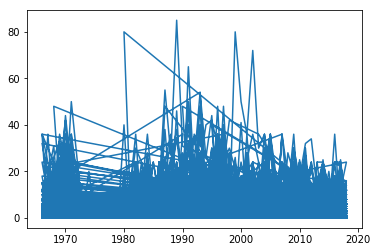

In [32]:
#Graph against time
#seaborn lineplot not integrated into latest version of conda
plt.plot(raw_data["count_year"], raw_data["min_snow"]);

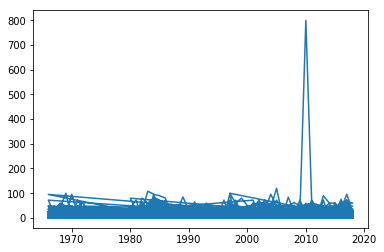

In [33]:
plt.plot(raw_data["count_year"], raw_data["max_snow"]);

In [53]:
raw_data["min_snow"].describe()

count    73558.000000
mean         1.182041
std          3.968637
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        555.000000
Name: min_snow, dtype: float64

In [35]:
#There are clearly some outliers, how many are there? 
len(raw_data[raw_data["min_snow"] > (raw_data["min_snow"].mean() + 3 * raw_data["min_snow"].std())])

1996

In [36]:
len(raw_data[raw_data["max_snow"] > (raw_data["max_snow"].mean() + 3 * raw_data["max_snow"].std())])

1768

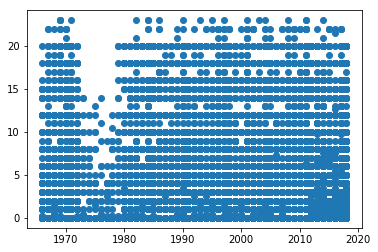

In [37]:
temp = raw_data.loc[raw_data["max_snow"] < (raw_data["max_snow"].mean() + 3 * raw_data["max_snow"].std()), :]
plt.scatter(temp["count_year"], temp["max_snow"]);

In [ ]:
#Very little relationship with time

In [38]:
#Create average snow variable
raw_data["average_snow"] = (raw_data["max_snow"] + raw_data["min_snow"]) / 2

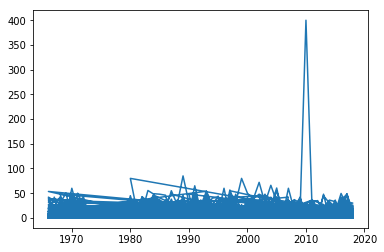

In [39]:
plt.plot(raw_data["count_year"], raw_data["average_snow"])

In [48]:
raw_data[raw_data['average_snow'] > 150]

,circle_name,country_state,lat,lon,count_year,n_field_counters,n_feeder_counters,min_field_count_parties,max_field_count_parties,field_hours,...,max_snow,snow_unit,am_cloud,pm_cloud,am_rain,pm_rain,am_snow,pm_snow,average_wind,average_snow
6697,Mono Lake,US-CA,37.956057,-119.120139,2010,14.0,1.0,1.0,9.0,54.5,...,800.0,2.0,3.0,6.0,3,3,3,3,3.0,400.0


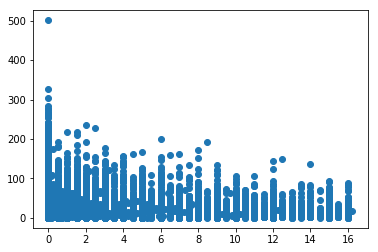

In [40]:
temp = raw_data.loc[raw_data["average_snow"] < (raw_data["average_snow"].mean() + 3 * raw_data["average_snow"].std()), :]
plt.scatter(temp["average_snow"], temp["n_field_counters"]);

### Wind

In [72]:
raw_data["wind_unit"].value_counts()

1.0    45895
0.0      874
3.0      131
Name: wind_unit, dtype: int64

In [73]:
raw_data["min_wind"].isnull().sum()

9091

In [74]:
raw_data["max_wind"].isnull().sum()

9044

In [77]:
raw_data["min_wind"].describe()

count    64467.000000
mean         4.091247
std          5.510043
min        -16.000000
25%          0.000000
50%          3.000000
75%          5.000000
max        454.000000
Name: min_wind, dtype: float64

In [78]:
raw_data["max_wind"].describe()

count    64514.000000
mean        12.228969
std         10.045787
min          0.000000
25%          5.000000
50%         10.000000
75%         15.000000
max        777.000000
Name: max_wind, dtype: float64

In [4]:
#How many outliers
def GetBounds(ser):
    lower = ser.mean() - 3 * ser.std()
    upper = ser.mean() + 3 * ser.std()
    return (lower, upper)

In [7]:
bounds = GetBounds(raw_data["min_wind"])
len(raw_data[(raw_data["min_wind"] < bounds[0]) | (raw_data["min_wind"] > bounds[1])])

619

In [8]:
bounds = GetBounds(raw_data["max_wind"])
len(raw_data[(raw_data["max_wind"] < bounds[0]) | (raw_data["max_wind"] > bounds[1])])

610

In [10]:
raw_data['min_wind'] = raw_data['min_wind'].fillna(0)
raw_data['max_wind'] = raw_data['max_wind'].fillna(0)

In [11]:
raw_data['average_wind'] = (raw_data['min_wind'] + raw_data['max_wind'])/2

In [12]:
raw_data['average_wind'].describe()

count    73558.000000
mean         7.155511
std          7.148713
min          0.000000
25%          2.500000
50%          5.500000
75%         10.000000
max        615.500000
Name: average_wind, dtype: float64

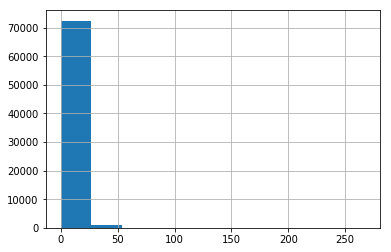

In [41]:
raw_data['average_wind'].hist()

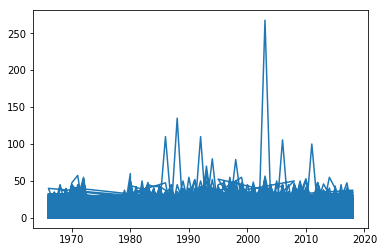

In [42]:
#Oddly similar to average snow
plt.plot(raw_data['count_year'], raw_data['average_wind'])

In [47]:
raw_data[raw_data["average_wind"] > 150]

,circle_name,country_state,lat,lon,count_year,n_field_counters,n_feeder_counters,min_field_count_parties,max_field_count_parties,field_hours,...,max_snow,snow_unit,am_cloud,pm_cloud,am_rain,pm_rain,am_snow,pm_snow,average_wind,average_snow
57216,Spearfish,US-SD,44.519824,-103.864184,2003,7.0,0.0,4.0,4.0,32.0,...,0.0,2.0,6.0,1.0,3,3,3,3,267.5,0.0


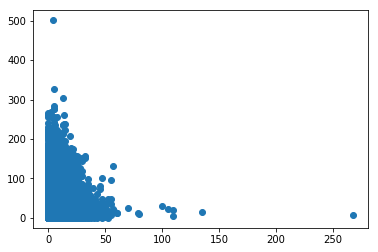

In [50]:
#Relationship with n field counters
plt.scatter(raw_data["average_wind"], raw_data["n_field_counters"]);

### Temperature

In [51]:
raw_data['temp_unit'].value_counts()

2.0    46757
1.0      140
Name: temp_unit, dtype: int64

In [58]:
raw_data[raw_data["temp_unit"] != 1.0][["min_temp", "max_temp"]].describe()

,min_temp,max_temp
count,65812.000000,65808.000000
mean,27.256237,42.336973
std,23.642586,17.985054
min,-52.000000,-49.000000
25%,18.000000,31.000000
50%,28.000000,41.000000
75%,36.000000,54.000000
max,4464.000000,768.000000
